In [3]:
!pip install pandas
!pip install sodapy

import pandas as pd
import sodapy
from sodapy import Socrata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 585 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
# crime_url = "https://data.cityofchicago.org/resource/9hwr-2zxp.json"


app_token = "8y23ArYxg4pcvOMgWzMFSC0nB"

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 app_token, 
                 username="ch35@illinois.edu",
                 password="68M8rz3vF!StBjD")


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9hwr-2zxp", limit = 5000)

# Convert to pandas DataFrame
crime_df = pd.DataFrame.from_records(results)

In [5]:
crime_df = pd.DataFrame.from_records(results)
crime_df.describe()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
count,5000,4917,5000,5000,4917,4917,5000,4995,5000,5000,...,5000,5000,5000,5000,5000,4917,5000,5000,5000,5000
unique,2422,4437,23,3889,4304,4437,170,89,15,77,...,50,4998,1,2,23,4437,274,26,2,5000
top,2022-12-05T12:00:00.000,"{'latitude': '41.807838121', 'human_address': ...",012,0000X W TERMINAL ST,1873151,41.807838121,SIMPLE,STREET,2022-12-13T15:48:01.000,25,...,27,JF496107,2022,False,06,-87.726337543,0421,THEFT,False,12915642
freq,23,15,357,16,15,15,547,1594,731,222,...,250,2,5000,4221,1095,15,47,1095,4530,1


In [6]:
crime_df.head()

,date,location,district,block,y_coordinate,latitude,description,location_description,updated_on,community_area,...,ward,case_number,year,domestic,fbi_code,longitude,beat,primary_type,arrest,id
0,2022-12-06T23:55:00.000,"{'latitude': '41.798784161', 'human_address': ...",002,053XX S GREENWOOD AVE,1870121,41.798784161,OVER $500,APARTMENT,2022-12-13T15:48:01.000,41,...,5,JF501063,2022,False,06,-87.599727485,0233,THEFT,False,12915642
1,2022-12-06T23:49:00.000,"{'latitude': '41.772681233', 'human_address': ...",007,002XX W MARQUETTE RD,1860536,41.772681233,AGGRAVATED - HANDGUN,STREET,2022-12-13T15:48:01.000,68,...,6,JF500895,2022,True,04A,-87.631918784,0722,ASSAULT,False,12914728
2,2022-12-06T23:40:00.000,"{'latitude': '41.878638996', 'human_address': ...",001,002XX S STATE ST,1899156,41.878638996,OVER $500,CTA STATION,2022-12-13T15:48:01.000,32,...,42,JF502675,2022,False,06,-87.627691486,0113,THEFT,False,12916296
3,2022-12-06T23:40:00.000,"{'latitude': '41.732098332', 'human_address': ...",022,016XX W 89TH ST,1845677,41.732098332,AUTOMOBILE,STREET,2022-12-13T15:48:01.000,73,...,21,JF501133,2022,False,07,-87.664574912,2221,MOTOR VEHICLE THEFT,False,12914907
4,2022-12-06T23:37:00.000,"{'latitude': '41.899415341', 'human_address': ...",015,010XX N LAWLER AVE,1906473,41.899415341,OVER $500,RESIDENCE,2022-12-13T15:48:01.000,25,...,37,JF500887,2022,True,06,-87.752031985,1531,THEFT,False,12914748


In [7]:
crime_df._get_numeric_data().columns

Index(['domestic', 'arrest'], dtype='object')

In [8]:
crime_df["iucr"].unique()

array(['0810', '051A', '0910', '1320', '0498', '2826', '0920', '0820',
       '1310', '2820', '0460', '0870', '0454', '1477', '0930', '5130',
       '143A', '0486', '0860', '1581', '031A', '0320', '1812', '4389',
       '502P', '1330', '1811', '1305', '0850', '4387', '041A', '1150',
       '0110', '0560', '2028', '143B', '0420', '0430', '0890', '031B',
       '0530', '4860', '0440', '1152', '2093', '2825', '5002', '5000',
       '0340', '2022', '0520', '0326', '1780', '1156', '0495', '1537',
       '0630', '5001', '0330', '0485', '4651', '0545', '1195', '3960',
       '1822', '0453', '0620', '1563', '0865', '1130', '1242', '2024',
       '1506', '0557', '0313', '1120', '0610', '2092', '1154', '2026',
       '0462', '1153', '0496', '2014', '1792', '1582', '2870', '1365',
       '0484', '0550', '1090', '0281', '0483', '1200', '0497', '1750',
       '501A', '1562', '0650', '141A', '4386', '1220', '0580', '051B',
       '3731', '1345', '1710', '3710', '0488', '1340', '1110', '0261',
      

In [9]:
result = crime_df.dtypes

print("Output:")
print(result)

Output:
date                    object
location                object
district                object
block                   object
y_coordinate            object
latitude                object
description             object
location_description    object
updated_on              object
community_area          object
iucr                    object
x_coordinate            object
ward                    object
case_number             object
year                    object
domestic                  bool
fbi_code                object
longitude               object
beat                    object
primary_type            object
arrest                    bool
id                      object
dtype: object


In [ ]:
crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]] = crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]].apply(pd.to_numeric)

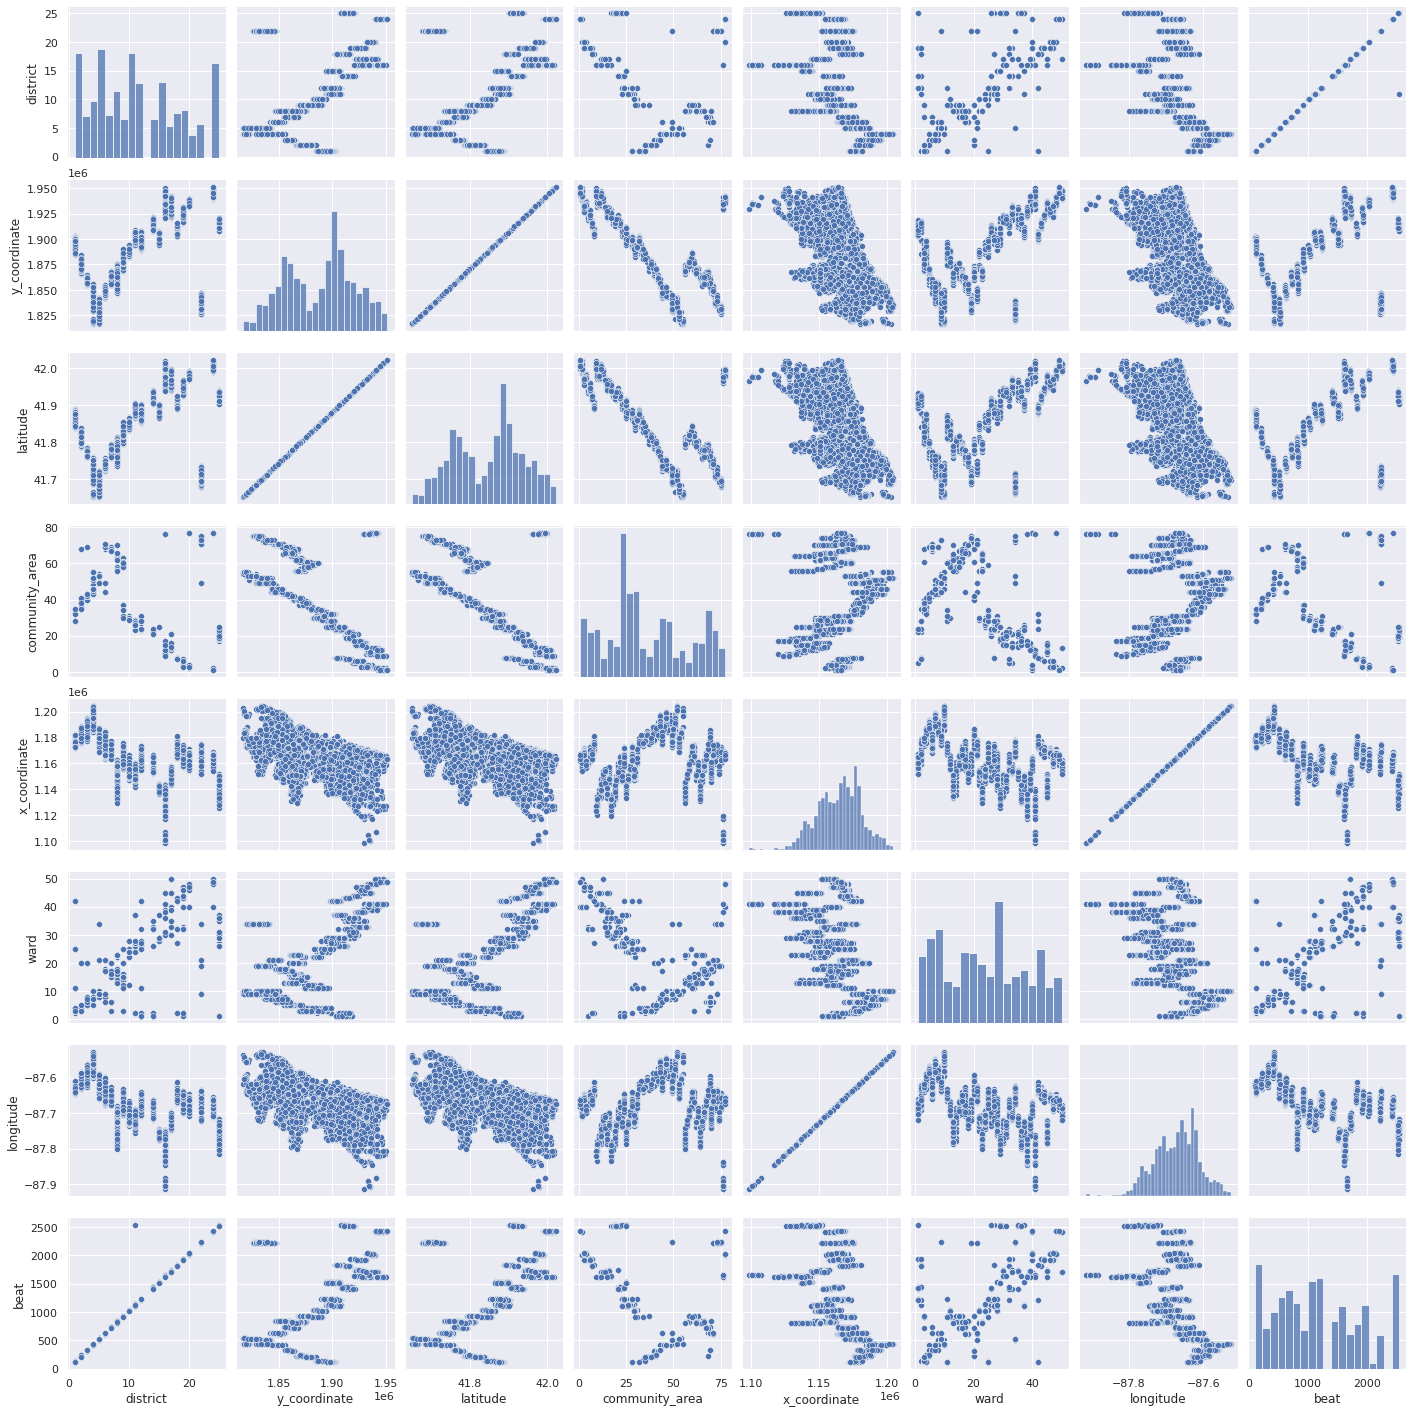

In [ ]:
# Seaborn visualization library
import seaborn as sns; sns.set(color_codes=True)
# Create the default pairplot
numeric_crime_df = crime_df[["district", "y_coordinate", "latitude", "community_area", "x_coordinate", "ward", "longitude", "beat"]]
sns.pairplot(numeric_crime_df)

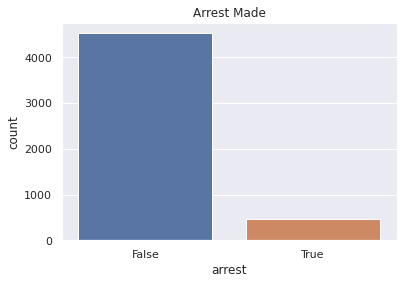

In [16]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="arrest", data=crime_df).set(title = "Arrest Made")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

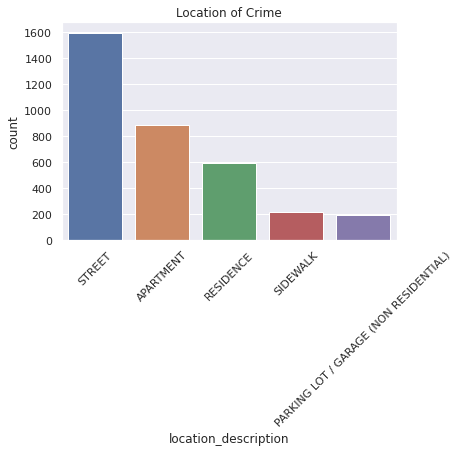

In [23]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="location_description", data=crime_df, order=crime_df.location_description.value_counts().iloc[:5].index).set(title = "Location of Crime")
plt.xticks(rotation=45)